<a href="https://colab.research.google.com/github/Shubhamjaiswal54/Hands-on-ml/blob/main/chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets  import   fetch_openml
mnist = fetch_openml('mnist_784' , version = 1)
X , Y = mnist["data"] , mnist["target"]
print(type(mnist))
X.shape
Y.shape
mnist.keys()

<class 'sklearn.utils._bunch.Bunch'>


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

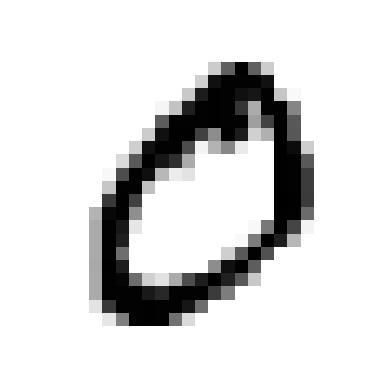

In [ ]:
#checking the data
import  matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[1]
some_digit_image = some_digit.values.reshape(28 ,28)

plt.imshow(some_digit_image ,cmap  = "binary")
plt.axis("off")
plt.show()


In [51]:
print(X.iloc[3].values)
print(Y.iloc[3])
X_train, X_test, y_train, y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 124 253 255  63
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  96 244 251 253  62   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127 251 251
 253  62   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  68 236 251 211  31   8   

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train ,y_train)

y_predict = model.predict(X_test)
print("Accuracy of the model will be " , accuracy_score(y_test , y_predict)*100)

Accuracy of the model will be  92.55


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
#selecting a stocatic gradient descent classifier
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state= 42)
sgd.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [54]:
sgd.predict([some_digit])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [56]:
# measuring performance of the model
from sklearn.model_selection import cross_val_score

print(cross_val_score(sgd ,  X_train ,y_train , cv=3,scoring= "accuracy" ))

[0.87365 0.85835 0.8689 ]
